<a href="https://colab.research.google.com/github/shreyasrajesh0308/Deep_Learning/blob/master/Deep_Learning_Book_Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Getting Started with Neural Nets, Classification and Regression

## Binary Classification 

### IMDB Data Classification

Restricting number of words in review to 10000

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
            num_words=10000)

Encoding input data with multi hot encoding to feed into the neural network

In [2]:
import numpy as np 

def vectorize_sequences(sequences, dimensions=10000):

  results = np.zeros((len(sequences), dimensions))

  for i, sequence in enumerate(sequences):

    for j in sequence:

      results[i, j] = 1
    
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building the Model 

For the case of vector input to scalar output clasification a stack of Dense layers does the job 

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation = "relu"),
  layers.Dense(16, activation = "relu"),
  layers.Dense(1, activation = "sigmoid")
  ])

In [40]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Create a Validation set

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
y_val.shape

(10000,)

In [43]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5192 - accuracy: 0.7920 - val_loss: 0.3956 - val_accuracy: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3121 - accuracy: 0.9015 - val_loss: 0.3051 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2278 - accuracy: 0.9258 - val_loss: 0.2786 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1778 - accuracy: 0.9424 - val_loss: 0.2770 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1469 - accuracy: 0.9517 - val_loss: 0.3028 - val_accuracy: 0.8821
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1189 - accuracy: 0.9625 - val_loss: 0.2931 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0980 - accuracy: 0.9706 - val_loss: 0.3094 - val_accuracy: 0.8859
Epoch 8/20
30

In [44]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

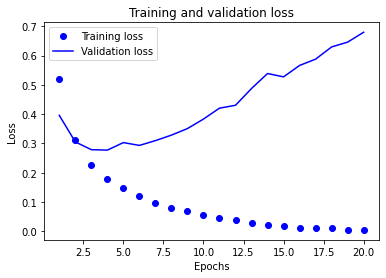

In [45]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

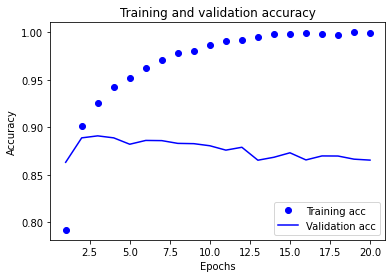

In [46]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We see a clear case of the validation error increasing while the training error goes on decreasing, this is a classic sign of **overfitting**

We see that the model learnt well until the 4th epoch, hence training until the 4th epoch we have

In [48]:
model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
        ])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4697 - accuracy: 0.8198
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2677 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2055 - accuracy: 0.9286
Epoch 4/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1727 - accuracy: 0.9391


In [49]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2886 - accuracy: 0.8855


### Further Experiments

### Model Architecture with one hidden layer

In [51]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5104 - accuracy: 0.8005 - val_loss: 0.4162 - val_accuracy: 0.8450
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3319 - accuracy: 0.8980 - val_loss: 0.3333 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2575 - accuracy: 0.9239 - val_loss: 0.2942 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2117 - accuracy: 0.9363 - val_loss: 0.2809 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1797 - accuracy: 0.9452 - val_loss: 0.2754 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1548 - accuracy: 0.9536 - val_loss: 0.2795 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1366 - accuracy: 0.9617 - val_loss: 0.2770 - val_accuracy: 0.8893
Epoch 8/20
30

Validation error starts shooting up at the 5th epoch

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 2s 30ms/step - loss: 0.4379 - accuracy: 0.8354
Epoch 2/5
49/49 [==============================] - 2s 31ms/step - loss: 0.2755 - accuracy: 0.9068
Epoch 3/5
49/49 [==============================] - 1s 29ms/step - loss: 0.2189 - accuracy: 0.9258
Epoch 4/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1864 - accuracy: 0.9350
Epoch 5/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1641 - accuracy: 0.9438


In [6]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2868 - accuracy: 0.8852


#### Model Architecture with 3 Hidden Layers

In [8]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5358 - accuracy: 0.7789 - val_loss: 0.4378 - val_accuracy: 0.8219
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3106 - accuracy: 0.8993 - val_loss: 0.3076 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2212 - accuracy: 0.9258 - val_loss: 0.2786 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1676 - accuracy: 0.9437 - val_loss: 0.2976 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1376 - accuracy: 0.9543 - val_loss: 0.2878 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1095 - accuracy: 0.9645 - val_loss: 0.3030 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0853 - accuracy: 0.9745 - val_loss: 0.3367 - val_accuracy: 0.8837
Epoch 8/20
30

Validation error starts shooting up at the 5th epoch

In [9]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 2s 30ms/step - loss: 0.4660 - accuracy: 0.8150
Epoch 2/5
49/49 [==============================] - 2s 32ms/step - loss: 0.2577 - accuracy: 0.9100
Epoch 3/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1948 - accuracy: 0.9296
Epoch 4/5
49/49 [==============================] - 1s 30ms/step - loss: 0.1637 - accuracy: 0.9415
Epoch 5/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1420 - accuracy: 0.9492


In [10]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3247 - accuracy: 0.8785


## MultiClass Classification

Case of multiple output classes but only one correct class for each input i.e **single-label multiclass classification**.

In [11]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
            num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [12]:
len(train_data), len(test_data)

(8982, 2246)

Again the data is of the same format as the Imdb dataset, hence we use 